<a href="https://colab.research.google.com/github/Annoymous-bot/DA-/blob/main/DA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
data = pd.read_csv("/content/sample_data/house_prices.csv")
data


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,460,0,40,0,0,0,0,0,2007,175000
1375,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,500,349,0,0,0,0,0,0,2010,210000
1376,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,252,0,60,0,0,0,0,2500,2010,266500
1377,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,240,366,0,112,0,0,0,0,2010,142125


In [ ]:

data.shape                                                                   # Evalute the methods

(1379, 35)

In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1379 non-null   float64
 1   LotArea        1379 non-null   int64  
 2   OverallQual    1379 non-null   int64  
 3   OverallCond    1379 non-null   int64  
 4   YearBuilt      1379 non-null   int64  
 5   YearRemodAdd   1379 non-null   int64  
 6   MasVnrArea     1379 non-null   float64
 7   BsmtFinSF1     1379 non-null   int64  
 8   BsmtFinSF2     1379 non-null   int64  
 9   BsmtUnfSF      1379 non-null   int64  
 10  TotalBsmtSF    1379 non-null   int64  
 11  1stFlrSF       1379 non-null   int64  
 12  2ndFlrSF       1379 non-null   int64  
 13  LowQualFinSF   1379 non-null   int64  
 14  GrLivArea      1379 non-null   int64  
 15  BsmtFullBath   1379 non-null   int64  
 16  BsmtHalfBath   1379 non-null   int64  
 17  FullBath       1379 non-null   int64  
 18  HalfBath

In [ ]:
data.describe()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,57.766497,10695.812183,6.187092,5.577955,1972.958666,1985.435098,108.364757,455.578680,48.102248,570.765047,...,500.762146,97.456853,47.276287,21.039159,3.609862,15.945613,2.920957,42.889050,2007.812183,185479.51124
std,35.038221,10214.702133,1.345780,1.081031,29.379883,20.444852,184.195220,459.691379,164.324665,443.677845,...,185.680520,126.699192,65.210465,60.535107,30.154682,57.249593,41.335545,501.613931,1.330221,79023.89060
min,0.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,35311.00000
25%,41.500000,7741.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,228.000000,...,380.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,134000.00000
50%,64.000000,9591.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,400.000000,0.000000,476.000000,...,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,167500.00000
75%,79.000000,11708.500000,7.000000,6.000000,2001.000000,2004.000000,170.500000,732.000000,0.000000,811.000000,...,580.000000,171.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,217750.00000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.00000


In [ ]:
 x = data['SalePrice']
print(x)


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1374    175000
1375    210000
1376    266500
1377    142125
1378    147500
Name: SalePrice, Length: 1379, dtype: int64


In [ ]:
mean = np.mean(x)
print("Mean-",mean)
median = np.median(x)
print("Median-",median)
mode = stats.mode(x)
print("Mode-",mode)

Mean- 185479.511240029
Median- 167500.0
Mode- ModeResult(mode=array([140000]), count=array([20]))


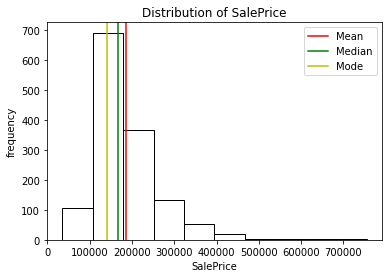

In [ ]:
# Visualize histogram for saleprice.
import matplotlib.pyplot as plt
plt.hist(x, bins = 10,color="white",edgecolor="black")
plt.xlabel("SalePrice")
plt.ylabel("frequency")
plt.title("Distribution of SalePrice")
plt.axvline(mean,color='r',label='Mean')
plt.axvline(median,color='g',label='Median')
plt.axvline(mode[0],color='y',label='Mode')
plt.legend()
plt.show()

In [ ]:
# MEASURES OF SPREAD :RANGE,VARIANCE,STANDARD DEVIATION,SKEWNESS KURTOSIS
range = np.ptp(x) # x.max() - x.min()
print("Range -",range)
print("Variance =",np.var(x))
print("Standard Deviation =",np.std(x))
from scipy.stats import skew
print("Skewness = ",skew(x))
from scipy.stats import kurtosis
print("Kurtosis=",kurtosis(x))


Range - 719689
Variance = 6240246804.531235
Standard Deviation = 78995.2327962342
Skewness =  1.9332562820097063
Kurtosis= 6.706904068638849


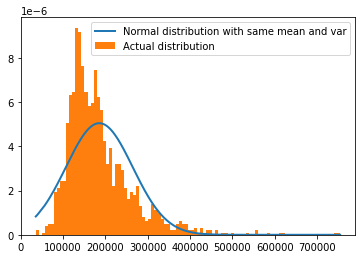

In [ ]:
# Evaluate Visualize the histogram of the normal distribution.
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(data['SalePrice'])
h = sorted(h)
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=True,bins = 100,label="Actual distribution") 
plt.legend()
plt.show()


In [ ]:
# Evaluate the Quartiles q1, q3 and iqr
q1 = x.quantile(0.25)
q1

134000.0

In [ ]:
q2 = x.quantile(0.5)
q2


167500.0

In [ ]:
q3 = x.quantile(0.75)
q3


217750.0

In [ ]:
 #interquartile range
# USE IQR rule to detect outliers
IQR = q3 - q1
IQR

83750.0

<function matplotlib.pyplot.show>

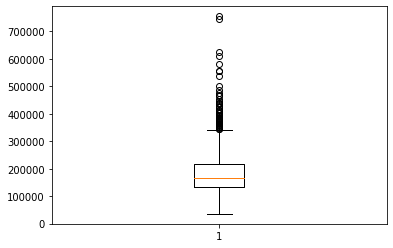

In [ ]:
 # Evaluate visualize boxplot
plt.boxplot(x)
plt.show

             LotArea  GrLivArea  GarageArea  SalePrice
LotArea     1.000000   0.257243    0.167622   0.252921
GrLivArea   0.257243   1.000000    0.478811   0.708172
GarageArea  0.167622   0.478811    1.000000   0.608405
SalePrice   0.252921   0.708172    0.608405   1.000000


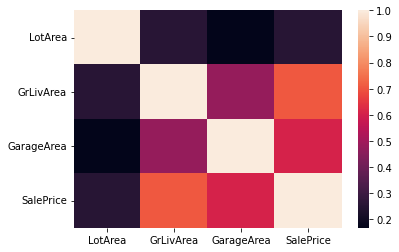

In [ ]:
# Evaluate the Correlation and covariance for the attributes in the dataset ----- lotarea,grlivarea,garagearea,saleprice
#checking correlation of 4 countinous variables
import seaborn as sns
%matplotlib inline
corelation=data[['LotArea','GrLivArea','GarageArea','SalePrice']].corr()
print (corelation)
sns.heatmap(corelation)


In [ ]:
 #covariance
data[['LotArea','GrLivArea','GarageArea','SalePrice']].cov().head()

,LotArea,GrLivArea,GarageArea,SalePrice
LotArea,1.043401e+08,1.364127e+06,3.179236e+05,2.041596e+08
GrLivArea,1.364127e+06,2.695069e+05,4.615466e+04,2.905241e+07
GarageArea,3.179236e+05,4.615466e+04,3.447726e+04,8.927251e+06
SalePrice,2.041596e+08,2.905241e+07,8.927251e+06,6.244775e+09
